In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
batch_size = 128
layers = 2
hid_size = 128
classes = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
Data = torchvision.datasets.MNIST('root/', download=True, train=True, transform=torchvision.transforms.ToTensor())
Test = torchvision.datasets.MNIST('root/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting root/MNIST/raw/train-images-idx3-ubyte.gz to root/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting root/MNIST/raw/train-labels-idx1-ubyte.gz to root/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting root/MNIST/raw/t10k-images-idx3-ubyte.gz to root/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting root/MNIST/raw/t10k-labels-idx1-ubyte.gz to root/MNIST/raw



Label: 7


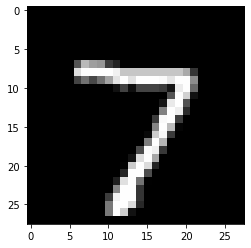

In [3]:
plt.imshow(Test[0][0][0],cmap='gray')
print('Label:', Test[0][1])

In [4]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN,self).__init__()
    self.num_layers = layers
    self.hidden_size = hid_size
    self.lstm = nn.LSTM(28,hid_size, layers, batch_first = True)
    self.lin = nn.Linear(hid_size, classes)
  def forward(self, x):
    res,_ = self.lstm(x)
    res = res[:,-1,:]
    res=self.lin(res)
    return res

In [5]:
from torch.utils.data import DataLoader
train_set = DataLoader(dataset = Data, batch_size = batch_size, shuffle = True)
test_set = DataLoader(dataset = Test, batch_size = batch_size)

In [6]:
Digits = RNN()
Digits = Digits.to(device)
Optim = torch.optim.Adam(Digits.parameters(), lr= 0.00017) 
loss_fn = nn.CrossEntropyLoss()
list1 = []
list2 = []
for epoch in range(11):
  with torch.no_grad():
    for dig, lab in test_set:
      dig = dig.reshape(-1, 28, 28).to(device)
      result = Digits(dig)
      lab = lab.to(device)
      loss = loss_fn(result, lab)
      print("Epoch - " + str(epoch) +", Loss_test - " + str(loss.item()), end = ' ' )
      _, pred = torch.max(result.data, dim=1)
      n = (pred==lab).sum().item()
      list1.append((1.0*n)/batch_size)
      break
  for i, (dig, lab) in enumerate(train_set):
    dig = dig.reshape(-1, 28, 28).to(device)
    result = Digits(dig)
    lab = lab.to(device)
    loss = loss_fn(result, lab)
    Optim.zero_grad()
    loss.backward()
    Optim.step()
    if i == 0:
      result = Digits(dig)
      loss = loss_fn(result, lab)
      print(", Loss_train - " + str(loss.item()))
      _, pred = torch.max(result.data, dim=1)
      n = (pred==lab).sum().item()
      list2.append((1.0*n)/batch_size)


Epoch - 0, Loss_test - 2.300072193145752 , Loss_train - 2.311728000640869
Epoch - 1, Loss_test - 0.45034345984458923 , Loss_train - 0.35003677010536194
Epoch - 2, Loss_test - 0.17751026153564453 , Loss_train - 0.2750157415866852
Epoch - 3, Loss_test - 0.1474553793668747 , Loss_train - 0.22463101148605347
Epoch - 4, Loss_test - 0.06957419961690903 , Loss_train - 0.15162214636802673
Epoch - 5, Loss_test - 0.0619494691491127 , Loss_train - 0.13672684133052826
Epoch - 6, Loss_test - 0.0690050721168518 , Loss_train - 0.06499629467725754
Epoch - 7, Loss_test - 0.04003897309303284 , Loss_train - 0.049679290503263474
Epoch - 8, Loss_test - 0.06816937774419785 , Loss_train - 0.09111691266298294
Epoch - 9, Loss_test - 0.035037506371736526 , Loss_train - 0.17180617153644562
Epoch - 10, Loss_test - 0.02934154123067856 , Loss_train - 0.08323699235916138


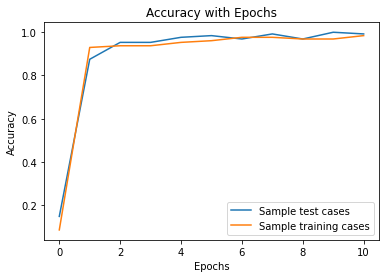

In [7]:
plt.plot(list1, label = 'Sample test cases')
plt.plot(list2, label = 'Sample training cases')
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Accuracy with Epochs")
plt.show()

In [8]:
with torch.no_grad():
  correct = 0
  total = 0
  for img, lab in test_set:
    img=img.reshape(-1,28,28).to(device)
    lab=lab.to(device)
    out = Digits(img)
    _, prediction = torch.max(out.data, dim=1)
    correct += (prediction==lab).sum().item()
    total += lab.size(0)
  print((1.0 * correct)/total)


0.9788
